# MOVIE REVIEW SENTIMENT ANALYSIS - 
### By: VANSH RATHORE
### College: JIET INSTITUTE OF DESIGN AND TECHNOLOGY

## LOADING DATA AND INSPECTING

In [1]:
# LOADING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOADING THE DATA
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
print("Number Of Rows: ",data.shape[0])
print("Number Of Columns: ",data.shape[1])

Number Of Rows:  50000
Number Of Columns:  2


In [4]:
# FINDING THE COLUMNS
print(data.columns)

Index(['review', 'sentiment'], dtype='object')


## EDA

In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [8]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
# Calculating the length of each review
data['length']=data['review'].apply(len)
data.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


## DATA VISUALIZATION

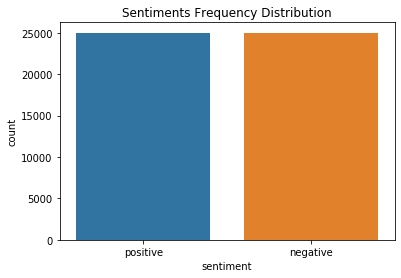

In [10]:
# Plotting the count of 
sns.countplot(x = 'sentiment', data = data)
plt.title("Sentiments Frequency Distribution")
plt.show()

We see that the frequency of sentiments both negative and positive is equal.

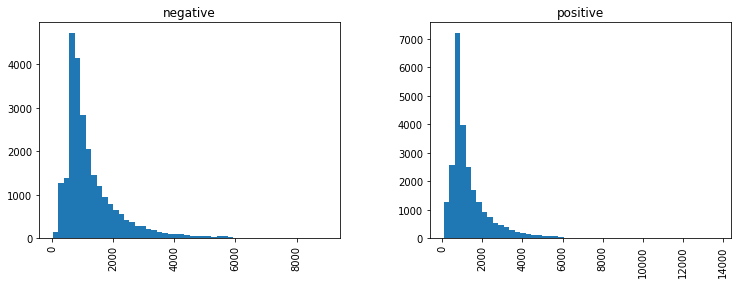

In [11]:
# Checking the distribution of Sentiment by the length of the reviews.
data.hist(column='length',by='sentiment',bins=50, figsize=(12,4))
plt.show()

Here we can see that the distribution of Sentiment according to length is almost similar.

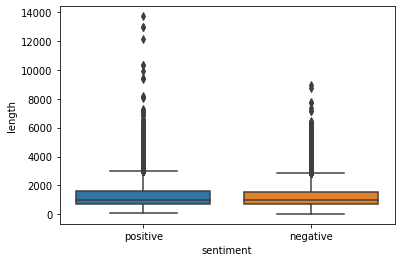

In [12]:
# Ploting box plot of of length of review
sns.boxplot(data.sentiment, data.length)
plt.show()

We can see that the length of positive reviews on average is more than the length of negative reviews

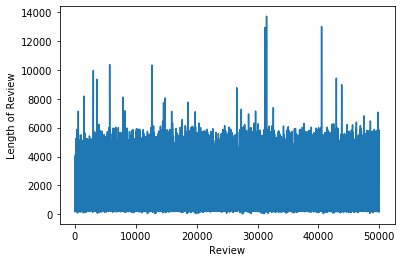

In [13]:
# Plotting to check the longest and shortest review
plt.plot(data['length'])
plt.xlabel('Review')
plt.ylabel('Length of Review')
plt.show()

In [14]:
print("The longest review in dataset: ")
data[data['length']== data.length.max()]

The longest review in dataset: 


,review,sentiment,length
31481,Match 1: Tag Team Table Match Bubba Ray and Sp...,positive,13704


In [15]:
print("The shortest review in dataset: ")
data[data['length']== data.length.min()]

The shortest review in dataset: 


,review,sentiment,length
27521,"Read the book, forget the movie!",negative,32


In [16]:
# CREATING LABELS - 0 for positive & 1- for negative
data['label']=data['sentiment'].map({'positive':0,'negative':1}).astype(int)
data.head()

,review,sentiment,length,label
0,One of the other reviewers has mentioned that ...,positive,1761,0
1,A wonderful little production. <br /><br />The...,positive,998,0
2,I thought this was a wonderful way to spend ti...,positive,926,0
3,Basically there's a family where a little boy ...,negative,748,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,0


In [17]:
import wordcloud

def plot_wordcloud(data_wc,title):
    text=' '.join(data_wc['review'].astype(str).tolist())
    stopwords=set(wordcloud.STOPWORDS)
    fig_wordcloud=wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',colormap='viridis',width=800,height=600).generate(text)
    plt.figure(figsize=(10,7),frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()

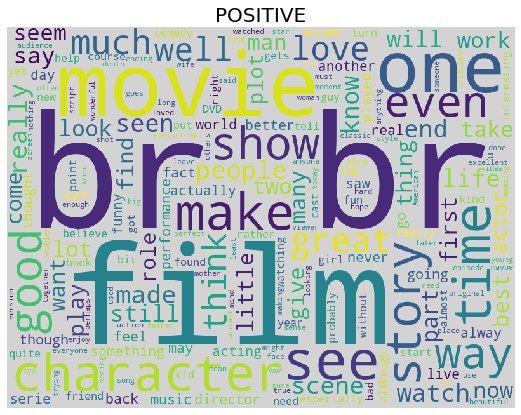

In [18]:
plot_wordcloud(data[data['label']==0],'POSITIVE')

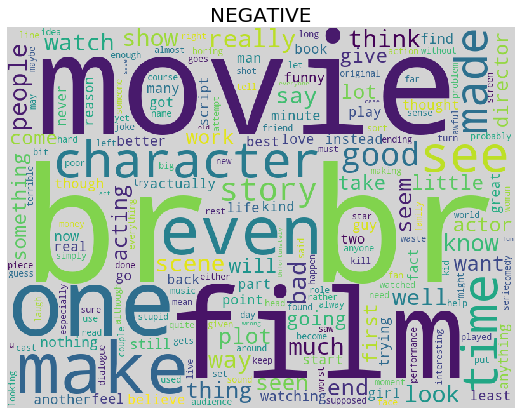

In [19]:
plot_wordcloud(data[data['label']==1],'NEGATIVE')

## DATA PREPROCESSING

In [20]:
import string
import re

In [21]:
def clean(text):
    # replace all non-aplhabetic char with space i.e removing numbers, punctuations & specail symbols
    data=re.sub('[^a-zA-Z]',' ',text)
    
    ## replacing all the whitespaces with normal spaces
    data=re.sub('\W',' ',data) 
    
    ## converting all letters to lowercase
    data=data.lower()
    
    ## removing the spaces at the left and right of sentences
    data=data.lstrip()
    data=data.rstrip()
    
    return data

In [22]:
cleaned_data=data['review'].apply(clean)

In [23]:
cleaned_data[0]

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me  br    br   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word  br    br   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   i would say the main appeal of the show is due to the fa

# LEXICAL PROCESSING

## TOKENIZATION

In [24]:
import nltk
from nltk.tokenize import word_tokenize

In [25]:
tokenized_data =data['review'].apply(lambda row:nltk.word_tokenize(row))

In [26]:
tokenized_data

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production, ., <, br, /...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there, 's, a, family, where, a, li...
4        [Petter, Mattei, 's, ``, Love, in, the, Time, ...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot, ,, bad, dialogue, ,, bad, acting, ...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I, 'm, going, to, have, to, disagree, with, t...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

## REMOVING STOPWORDS

In [27]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    stop_words=set(stopwords.words('english'))
    cleaned_text=[word for word in text if word not in stop_words]
    return cleaned_text

In [28]:
removed_stop_words = tokenized_data.apply(remove_stopwords)

In [29]:
removed_stop_words

0        [One, reviewers, mentioned, watching, 1, Oz, e...
1        [A, wonderful, little, production, ., <, br, /...
2        [I, thought, wonderful, way, spend, time, hot,...
3        [Basically, 's, family, little, boy, (, Jake, ...
4        [Petter, Mattei, 's, ``, Love, Time, Money, ''...
                               ...                        
49995    [I, thought, movie, right, good, job, ., It, n...
49996    [Bad, plot, ,, bad, dialogue, ,, bad, acting, ...
49997    [I, Catholic, taught, parochial, elementary, s...
49998    [I, 'm, going, disagree, previous, comment, si...
49999    [No, one, expects, Star, Trek, movies, high, a...
Name: review, Length: 50000, dtype: object

## LEMITIZATION

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatization=WordNetLemmatizer()
def lemmatize_text(text):
    lemma =[lemmatization.lemmatize(word,pos='v')for word in text]
    return lemma

In [31]:
lemmatized_text = removed_stop_words.apply(lemmatize_text)

In [32]:
lemmatized_text

0        [One, reviewers, mention, watch, 1, Oz, episod...
1        [A, wonderful, little, production, ., <, br, /...
2        [I, think, wonderful, way, spend, time, hot, s...
3        [Basically, 's, family, little, boy, (, Jake, ...
4        [Petter, Mattei, 's, ``, Love, Time, Money, ''...
                               ...                        
49995    [I, think, movie, right, good, job, ., It, n't...
49996    [Bad, plot, ,, bad, dialogue, ,, bad, act, ,, ...
49997    [I, Catholic, teach, parochial, elementary, sc...
49998    [I, 'm, go, disagree, previous, comment, side,...
49999    [No, one, expect, Star, Trek, movies, high, ar...
Name: review, Length: 50000, dtype: object

## CREATING CORPUS

In [33]:
corpus=[]
for  i in lemmatized_text:
    msg=' '.join([row for row in i])
    corpus.append(msg)

In [34]:
corpus[0]

"One reviewers mention watch 1 Oz episode 'll hook . They right , exactly happen me. < br / > < br / > The first thing strike Oz brutality unflinching scenes violence , set right word GO . Trust , show faint hearted timid . This show pull punch regard drug , sex violence . Its hardcore , classic use word. < br / > < br / > It call OZ nickname give Oswald Maximum Security State Penitentary . It focus mainly Emerald City , experimental section prison cells glass front face inwards , privacy high agenda . Em City home many..Aryans , Muslims , gangstas , Latinos , Christians , Italians , Irish ... .so scuffle , death star , dodgy deal shady agreements never far away. < br / > < br / > I would say main appeal show due fact go show would n't dare . Forget pretty picture paint mainstream audiences , forget charm , forget romance ... OZ n't mess around . The first episode I ever saw strike nasty surreal , I could n't say I ready , I watch , I develop taste Oz , get accustom high level graphic 

## VECTORIZATION

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(corpus)

In [37]:
print(tfidf_model)

  (0, 75853)	0.046844389147846506
  (0, 21108)	0.0763902315542167
  (0, 84978)	0.048481372005211194
  (0, 83453)	0.06393236579396024
  (0, 89834)	0.04252674409466948
  (0, 87141)	0.07349519679548892
  (0, 17504)	0.07529136493721009
  (0, 8545)	0.036702372213443864
  (0, 52656)	0.03809435039125094
  (0, 91035)	0.0638330472848787
  (0, 28963)	0.04602569818306858
  (0, 76495)	0.06673506528878186
  (0, 80022)	0.05664681322278692
  (0, 47352)	0.04425432859349898
  (0, 9827)	0.07946707248725965
  (0, 86340)	0.03626834195904046
  (0, 16502)	0.052124991474639636
  (0, 54163)	0.051218859348733
  (0, 51699)	0.08681543155609174
  (0, 91405)	0.025886780945114974
  (0, 60242)	0.04926181077986581
  (0, 46057)	0.03894279625878951
  (0, 42276)	0.17507294862135725
  (0, 58038)	0.10491459735899891
  (0, 74130)	0.05770137090105751
  :	:
  (49999, 56174)	0.20604668278034088
  (49999, 57568)	0.08701050460261342
  (49999, 35201)	0.05324764495746794
  (49999, 9256)	0.07149613622806557
  (49999, 46554)	0.0627

# NAIVE BAYES CLASSIFICATION MODEL

In [38]:
X = tfidf_model

In [39]:
y = data['label']

In [40]:
# Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=34)

In [41]:
from sklearn.naive_bayes import MultinomialNB
#creating the model
clf=MultinomialNB()

# training the model
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
# testing the model - predicting the labels
pred=clf.predict(X_test)

# predicting the class probabilities
y_pred_proba = clf.predict_proba(X_test)

In [43]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [44]:
y_test

28451    1
37664    0
33749    1
27384    1
23276    0
        ..
19293    0
26599    1
39976    1
4193     1
34193    1
Name: label, Length: 10000, dtype: int32

## EVALUATING THE MODEL

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
acc=accuracy_score(y_test,pred)

In [46]:
# CALCULATING THE ACCURACY
print("ACCURACY:\t",acc)

ACCURACY:	 0.8523


In [47]:
# CREATING CONFUSION MATRIX
confusion = confusion_matrix(y_test,pred)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
print("THE CONFUSION MATRIX: ")
print(confusion)

THE CONFUSION MATRIX: 
[[4108  847]
 [ 630 4415]]


In [48]:
def plot_confusion_matrix(y_true,y_pred):
    fig,ax=plt.subplots(figsize=(8,4))
    matrix=confusion_matrix(y_true,y_pred)
    sns.heatmap(matrix,annot=True,fmt='d',linewidths=.5,cmap='summer_r',cbar=False,ax=ax)
    plt.ylabel('TRUE LABEL')
    plt.xlabel('PREDICTED LABEL')
    plt.title('CONFUSION MATRIX')
    
    

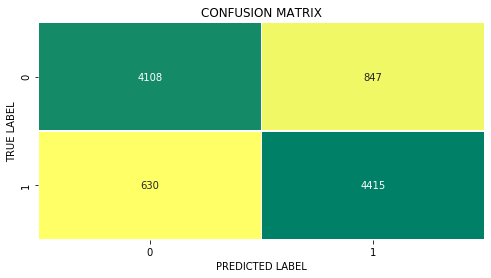

In [49]:
# PLOTTING THE CONFUSION MATRIX
plot_confusion_matrix(y_test,pred)

In [50]:
# CALCULATING SENSITIVITY AND SPECIFICITY
sensitivity = TP / float(FN + TP)
print("SENSITIVITY:  ",sensitivity)

specificity = TN / float(TN + FP)
print("SPECIFICITY:  ",specificity)

SENSITIVITY:   0.8751238850346879
SPECIFICITY:   0.8290615539858729


In [51]:
# FINDING PRECISION, RECALL AND F1-SCORE
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4955
           1       0.84      0.88      0.86      5045

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## CROSS VALDATING

In [52]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=34, shuffle=True)

In [53]:
cv

KFold(n_splits=5, random_state=34, shuffle=True)

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [55]:
print(scores)
print('\nMean of Accuracy: %.3f \nStandard Dev. of Accuracy: %.3f' % (np.mean(scores), np.std(scores)))

[0.93179604 0.9406472  0.93737465 0.93847103 0.93767876]

Mean of Accuracy: 0.937 
Standard Dev. of Accuracy: 0.003


## ROC CURVE

In [56]:
y_pred_proba

array([[0.31940861, 0.68059139],
       [0.80500886, 0.19499114],
       [0.40327843, 0.59672157],
       ...,
       [0.25493769, 0.74506231],
       [0.2129264 , 0.7870736 ],
       [0.28238892, 0.71761108]])

In [57]:
# creating an ROC curve
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [58]:
# area under the curve
print("Area under ROC:  ",roc_auc)

Area under ROC:   0.9317960354788737


In [59]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,1.994028,0.000000,0.000000
1,0.994028,0.000198,0.000000
2,0.966227,0.013280,0.000000
3,0.965814,0.013280,0.000202
4,0.964444,0.014470,0.000202
...,...,...,...
2062,0.091291,0.999604,0.945106
2063,0.091197,0.999802,0.945106
2064,0.073729,0.999802,0.966498
2065,0.073464,1.000000,0.966498


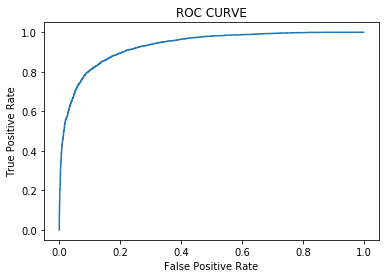

In [60]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC CURVE')
plt.plot(false_positive_rate, true_positive_rate)